# Introduction
**workspace for Machine Learning 

I am building and continually improving a model to predict housing prices in Iowa, USA.

Please wait for me to finish this.

# Code Below



In [3]:
import pandas as pd

main_file_path = '../input/train.csv'
data = pd.read_csv(main_file_path)
print('hello world')

hello world


In [ ]:
print(data.describe())

In [4]:
print(data.columns)

house_saleprice = data.SalePrice
print(house_saleprice.head())

columns_of_interest = ['LotArea', 'PoolArea']
two_columns = data[columns_of_interest]
print(two_columns.describe())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Define X and Y
y = data.SalePrice
house_predictors = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
x = data[house_predictors]

#Sk-Learn Import
from sklearn.tree import DecisionTreeRegressor

#Define Model
house_model = DecisionTreeRegressor()

#Fit Model
house_model.fit(x, y)

print("Making predictions for the following 5 houses:")
print(x.head())
print("The predictions are")
print(house_model.predict(x.head()))


Making predictions for the following 5 houses:
   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  
The predictions are
[ 208500.  181500.  223500.  140000.  250000.]


# Model Validation

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#MAE
predicted_home_prices = house_model.predict(x)
mean_absolute_error(y, predicted_home_prices)
#Training Model
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)
#Define Model
house_model = DecisionTreeRegressor()
#Fit Model
house_model.fit(train_x, train_y)
#Predictions on Validated Data
val_predictions = house_model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))

32582.6410959


# Underfitting, Overfitting, & Model Optimisation 

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  35190
Max leaf nodes: 50  		 Mean Absolute Error:  27825
Max leaf nodes: 500  		 Mean Absolute Error:  32662
Max leaf nodes: 5000  		 Mean Absolute Error:  33382


# Random Forests Algorithm - Machine Learning

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor()
forest_model.fit(train_x, train_y)
iowa_preds = forest_model.predict(val_x)
print(mean_absolute_error(val_y, iowa_preds))

24259.7066667


In [9]:
#Submission Creation, Prep, and submit
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Read the data
train = pd.read_csv('../input/train.csv')

# pull data into target (y) and predictors (X)
train_y = train.SalePrice
predictor_cols = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']

# Create training predictors data
train_X = train[predictor_cols]

my_model = RandomForestRegressor()
my_model.fit(train_X, train_y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [10]:
#Prep
# Read the test data
test = pd.read_csv('../input/test.csv')
# Treat the test data in the same way as training data. 
test_X = test[predictor_cols]
#predictions
predicted_prices = my_model.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

[ 126600.   191100.   154090.  ...,  156480.4  136950.   276997. ]


In [11]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
# submission file name
my_submission.to_csv('Iowa.csv', index=False)

# Handling Missing Values

In [12]:
#Finding Missing Data Values
print(data.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [13]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Y = data.pop('SalePrice')
print (Y.head())

missing_data_cols = [col for col in data.columns if data[col].isnull().any()]

X = data.copy()

train_x,val_x,train_y,val_y = train_test_split(X,Y,test_size=0.4, random_state=0)

red_x_train = train_x.drop(missing_data_cols, axis=1)
red_x_val = val_x.drop(missing_data_cols, axis=1)

red_x_train = red_x_train.select_dtypes(exclude=['object'])
red_x_val = red_x_val.select_dtypes(exclude=['object'])

rgr = RandomForestRegressor()
rgr.fit(red_x_train,train_y)
pred_y = rgr.predict(red_x_val)
print (mean_absolute_error(val_y,pred_y))


my_imputer = Imputer()
imputed_x_train = my_imputer.fit_transform(train_x.select_dtypes(exclude=['object']))
imputed_x_val = my_imputer.transform(val_x.select_dtypes(exclude=['object']))

rgr = RandomForestRegressor()
rgr.fit(imputed_x_train,train_y)
pred_y = rgr.predict(imputed_x_val)

print (mean_absolute_error(val_y,pred_y))

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
19703.9541096
18739.4284247


One Hot Encoding - Categorical Variables

In [14]:
import pandas as pd

# Reading train and test Data
train_data =  pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')

#dropping all rows where the SalePrice is missing
train_data.dropna(axis =0, subset=['SalePrice'],inplace=True)

#separating the target values from main set
target = train_data.SalePrice

#finding columns with missing values
cols_with_missing_values = [col for col in train_data.columns
                                   if train_data[col].isnull().any()]

#Removing all the columns with missing values as well as ID and salePrice column as Id is not going to be helpful in prediction of Sale Price
candidate_train_predictors = train_data.drop(['Id','SalePrice']+cols_with_missing_values, axis=1)
candidate_test_predictors = test_data.drop(['Id']+cols_with_missing_values, axis=1)

#Choosing only those columns for on hot encodding where the categorical value for any attribute is not more than 10
low_cardinality_cols = [cname for cname in candidate_train_predictors.columns
                                       if candidate_train_predictors[cname].nunique()< 10 and
                                       candidate_train_predictors[cname].dtype=="object"]
numeric_cols = [cname for cname in candidate_train_predictors.columns
                               if candidate_train_predictors[cname].dtype in ['int64', 'float64']]

useful_cols = low_cardinality_cols + numeric_cols
train_predictors = candidate_train_predictors[useful_cols]
test_predictors = candidate_test_predictors[useful_cols]

In [16]:
#To check the datatypes of the final data been selected
#print(train_predictors.dtypes)

one_hot_encoded_data = pd.get_dummies(train_predictors)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

#function to find the cross validation score using random forest
#scoring values and its types can be found on http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
def get_mae(X,y):
    return -1 * cross_val_score(RandomForestRegressor(100),X,y,scoring="neg_mean_absolute_error").mean()

predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])
mae_without_categoricals = get_mae(predictors_without_categoricals, target)
mae_one_hot_encoded = get_mae(one_hot_encoded_data, target)

print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))
#print(one_hot_encoded_data)
#print(cross_val_score(RandomForestRegressor(100), one_hot_encoded_data, target, cv = 5,scoring = 'neg_mean_absolute_error'))
#print(cross_val_score(RandomForestRegressor(100), one_hot_encoded_data, target, cv = 5))

Mean Absolute Error when Dropping Categoricals: 18088
Mean Abslute Error with One-Hot Encoding: 17966


In [18]:
print(train_predictors.shape)
print(test_predictors.shape)

one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)

#e can see that both training set and test set have different number of columns after converting them to one hot encoding, as the test set might not be having some set of values as training set does, so we need to align them
print(one_hot_encoded_test_predictors.shape)
print(one_hot_encoded_training_predictors.shape)

final_train,final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors, join="left", axis=1)

print(final_train.shape)
print(final_test.shape)

(1460, 57)
(1459, 57)
(1459, 148)
(1460, 159)
(1460, 159)
(1459, 159)


# XGBoost

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

data = pd.read_csv('../input/train.csv')
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [20]:
# make predictions
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 17229.7477098


In [21]:
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [22]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Partial Dependence Plots

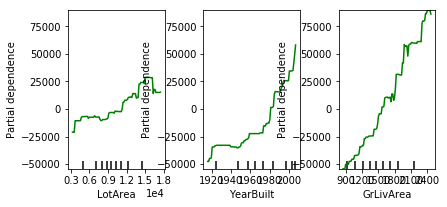

In [23]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

cols_to_use = ['LotArea', 'YearBuilt', 'GrLivArea']

def get_some_data():
    data = pd.read_csv('../input/train.csv')
    y = data.SalePrice
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_x = my_imputer.fit_transform(X)
    return imputed_x, y

X, y = get_some_data()
my_model = GradientBoostingRegressor()
my_model.fit(X,y)
my_plots = plot_partial_dependence(my_model, features=[0,1,2], X=X,
                                  feature_names=cols_to_use,
                                  grid_resolution = 100)

# Scikit-Learn Pipelines

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [28]:
my_pipeline.fit(train_X, train_y)
predictions = my_pipeline.predict(test_X)

# Cross Validation Procedure

In [46]:
import pandas as pd
data = pd.read_csv('../input/train.csv')
cols_to_use = ['LotArea']
X = data[cols_to_use]
y = data.SalePrice

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-58334.94295297 -57163.72165222 -55884.81598659]


# Data Leakage